In [1]:
import pandas as pd
import os
import numpy as np
from glob import glob
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [2]:
data1 = pd.read_csv('C:/Users/user/Documents/AIRBNB PROJECT/latih.csv')
data1.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,time
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,1,NYC,1,...,40.696524,-73.991617,Brooklyn Heights,2,100.0,11201,1.0,1.0,150.0,3988
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,1,NYC,1,...,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,169.0,2077
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,1,NYC,1,...,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,145.0,2314
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,1,SF,1,...,37.772004,-122.431619,Lower Haight,0,0.0,94117.0,2.0,2.0,750.0,2869
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,1,DC,1,...,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0,115.0,2918


In [3]:
# deskripsi tiap kolom
def fix_zip(series):
      return series.astype(str).str.split('-').str[0].str.zfill(5)
data1['zipcode'] = fix_zip(data1['zipcode'])
data1['zipcode'] = data1['zipcode'].str.replace('.', ' ')
data1["zipcode"] = data1["zipcode"].str.extract(r"(\d{5})")
data1.head(20)

C:\Users\user\AppData\Local\Temp\ipykernel_17016\1178271726.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['zipcode'] = data1['zipcode'].str.replace('.', ' ')


,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,time
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,1,NYC,1,...,40.696524,-73.991617,Brooklyn Heights,2,100.0,11201,1.0,1.0,150.0,3988
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,1,NYC,1,...,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,169.0,2077
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,1,NYC,1,...,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,145.0,2314
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,1,SF,1,...,37.772004,-122.431619,Lower Haight,0,0.0,94117,2.0,2.0,750.0,2869
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,1,DC,1,...,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0,115.0,2918
5,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,1,SF,1,...,37.753164,-122.429526,Noe Valley,3,100.0,94131,1.0,1.0,85.0,2089
6,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,1,LA,1,...,34.046737,-118.260439,Downtown,9,93.0,90015,1.0,1.0,120.0,3570
7,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,1,SF,1,...,37.781128,-122.501095,Richmond District,159,99.0,94121,1.0,1.0,120.0,2823
8,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,1,NYC,1,...,40.723883,-73.983880,Alphabet City,82,93.0,10009,1.0,1.0,100.0,3622
9,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",2,1.0,Real Bed,flexible,1,LA,1,...,33.813228,-118.389434,Torrance,0,0.0,90277,1.0,1.0,70.0,2482


<AxesSubplot:>

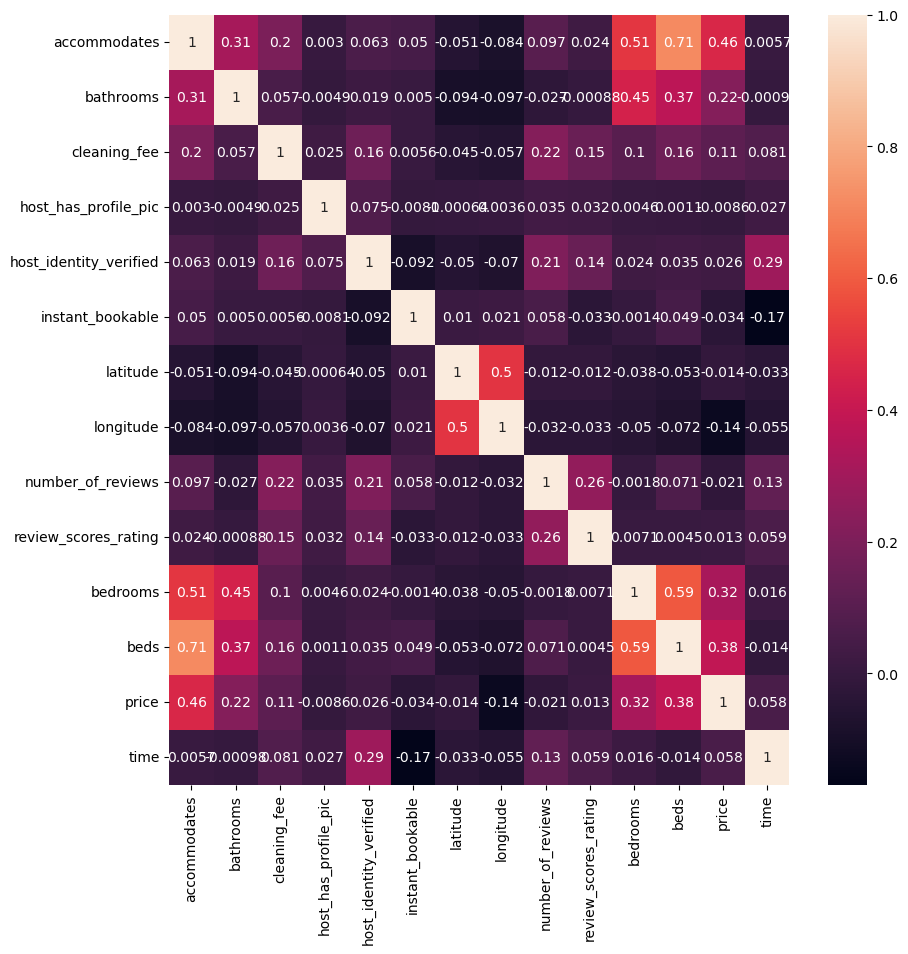

In [4]:
# melihat korelasi antar variabel
import matplotlib.pyplot as plt
import seaborn as sns
corr = data1.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True)

In [5]:
# korelasi masing-masing variabel bebas terhadap harga
data1.corr()['price']

accommodates              0.525415
bathrooms                 0.456472
cleaning_fee              0.028898
host_has_profile_pic     -0.013276
host_identity_verified   -0.014249
instant_bookable         -0.024537
latitude                 -0.047818
longitude                -0.077014
number_of_reviews        -0.071201
review_scores_rating     -0.121783
bedrooms                  0.496318
beds                      0.436465
price                     1.000000
time                      0.015386
Name: price, dtype: float64

In [6]:
# EXPLORE DATA DESKRIPTIF atau KATEGORIK
# untuk kolom yang deskriptif, akan dilihat jumlah kategori yang ada

## Tipe properti
data1.property_type.value_counts()

Apartment             31546
House                  9545
Condominium            1671
Townhouse              1010
Loft                    797
Other                   385
Guesthouse              310
Bed & Breakfast         265
Bungalow                211
Guest suite              90
Dorm                     81
Villa                    75
Timeshare                54
Boutique hotel           52
In-law                   44
Hostel                   42
Cabin                    42
Camper/RV                35
Boat                     33
Serviced apartment       14
Castle                    9
Vacation home             8
Yurt                      7
Tent                      6
Treehouse                 4
Tipi                      3
Hut                       3
Chalet                    3
Earth House               3
Casa particular           1
Cave                      1
Name: property_type, dtype: int64

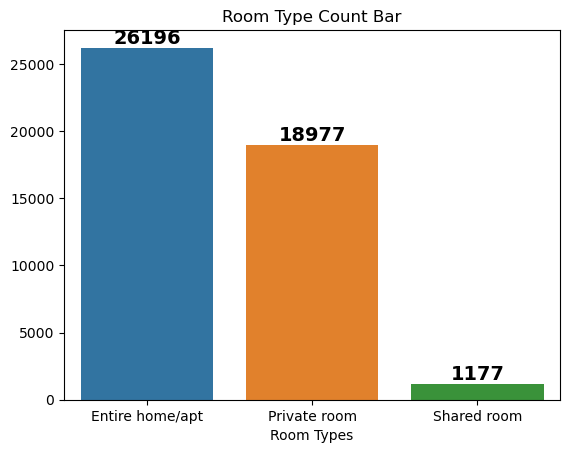

In [7]:
# Tipe room
room_type_plot = sns.countplot(x="room_type", order = data1.room_type.value_counts().index, data=data1)
room_type_plot.set(xlabel='Room Types', ylabel='', title='Room Type Count Bar')
for bar in room_type_plot.patches:
    h = bar.get_height()
    room_type_plot.text(
        bar.get_x() + bar.get_width()/2.,  # bar index (x coordinate of text)
        h,                                 # y coordinate of text
        '%d' % int(h),                     # y label
        ha='center', 
        va='bottom',
        color='black',
        fontweight='bold',
        size=14)
    
plt.show()

In [8]:
# Tipe kamar
data1.bed_type.value_counts()

Real Bed         44988
Futon              510
Pull-out Sofa      390
Airbed             295
Couch              167
Name: bed_type, dtype: int64

In [9]:
data1.cancellation_policy.value_counts()

strict             20451
flexible           13866
moderate           11959
super_strict_30       67
super_strict_60        7
Name: cancellation_policy, dtype: int64

In [46]:
data1.city.value_counts()

NYC        22084
LA         11912
SF          4456
DC          3379
Boston      2410
Chicago     2109
Name: city, dtype: int64

In [10]:
data1.zipcode.value_counts()

11211    1162
11221     825
90291     804
94110     693
11206     690
         ... 
60707       1
60628       1
11362       1
90071       1
11239       1
Name: zipcode, Length: 578, dtype: int64

In [11]:
# EXPLORE DATA NUMERIK
## akan dilihat pada kolom berikut yang memiliki nilai nol, karena kolom dibawah ini tidak mungkin bernilai nol
count = (data1['accommodates'] == 0).sum()
count1 = (data1['bathrooms'] == 0).sum()
count2 = (data1['beds'] == 0).sum()
count3 = (data1['zipcode'] == 0).sum()
count4 = (data1['price'] == 0).sum()

print('Count of zeros in Column accommodates : ', count)
print('Count of zeros in Column bathrooms : ', count1)
print('Count of zeros in Column beds : ', count2)
print('Count of zeros in Column zipcode : ', count3)
print('Count of zeros in Column price : ', count4)

Count of zeros in Column accommodates :  0
Count of zeros in Column bathrooms :  109
Count of zeros in Column beds :  2
Count of zeros in Column zipcode :  0
Count of zeros in Column price :  0


In [12]:
# tidak mungkin tidak ada kamar mandi dan kasur, memungkinkan tidak ada bedrooms jika bentuk studio
data1.drop(data1[data1['bathrooms'] == 0].index, inplace = True)
data1.drop(data1[data1['beds'] == 0].index, inplace = True)
data1.to_csv('latihclean.csv', index=False)

In [13]:
import plotly.express as px

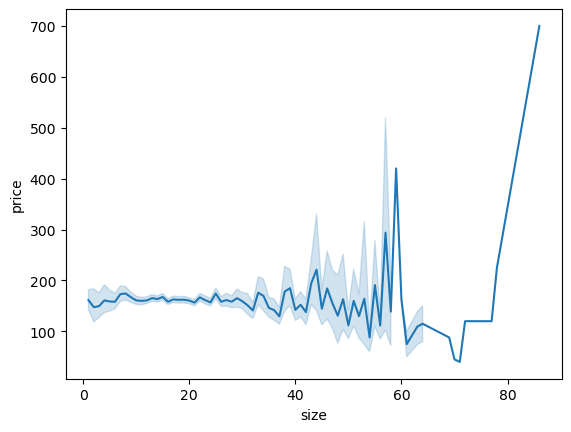

In [17]:
# amenities
# menghitung banyaknya amenities
amenities = data1.amenities
number_of_amenites=[]
for row in amenities:
    number_of_amenites.append(row.count(",")+1)
number_of_amenites[0]
amenities = amenities.to_frame()
amenities['size']=pd.DataFrame(number_of_amenites)
amenities['price']=data1['price']
amenities.head()

# membuat pola hubungan banyaknya amenities(fasilitas) dengan harga
ax = sns.lineplot(x=amenities['size'], y = amenities['price'])

# tidak ada hubungan banyaknya fasilitas dengan harga karena grafik tidak menunjukan pola tertentu

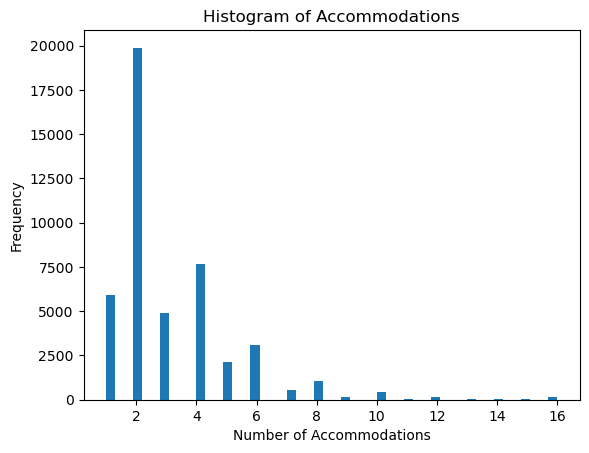

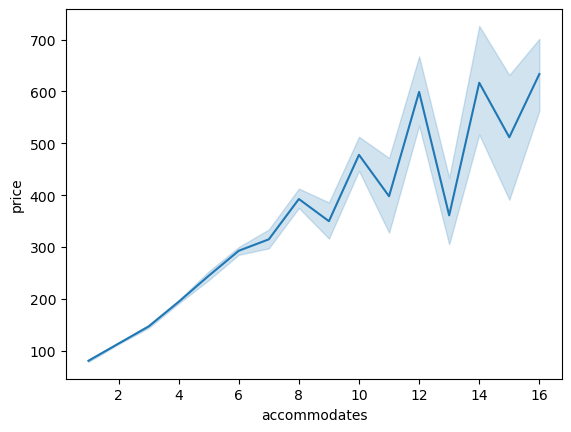

In [20]:
# visualisasi banyaknya akomodasi
plt.hist(data1['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

ax = sns.lineplot(x=data1['accommodates'], y = data1['price'])


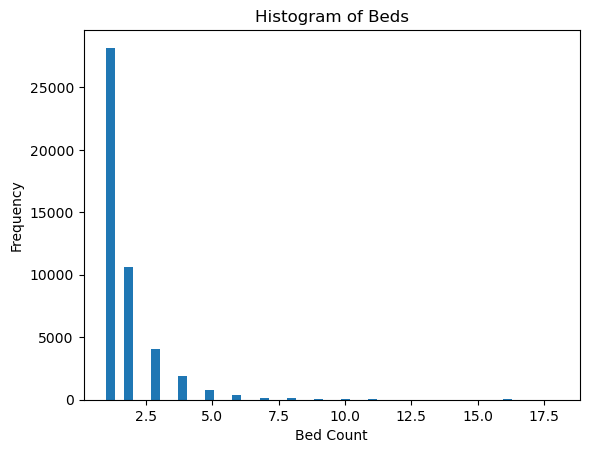

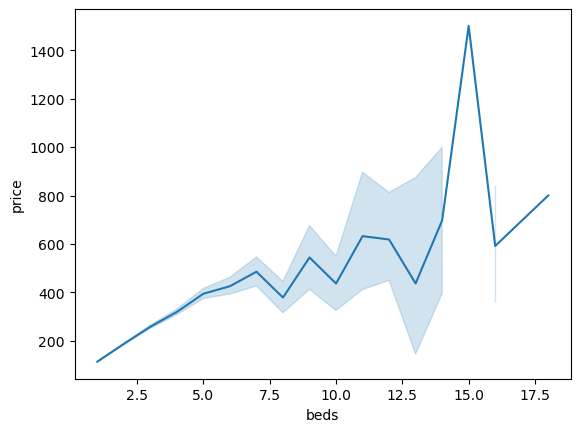

In [21]:
# visualisasi banyaknya tempat tidur
plt.hist(data1['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()
ax = sns.lineplot(x=data1['beds'], y = data1['price'])

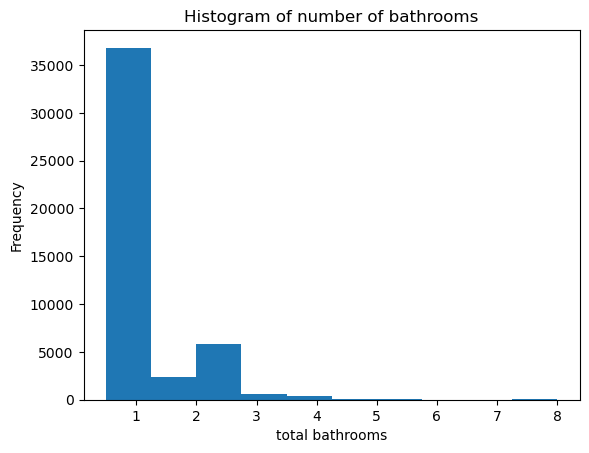

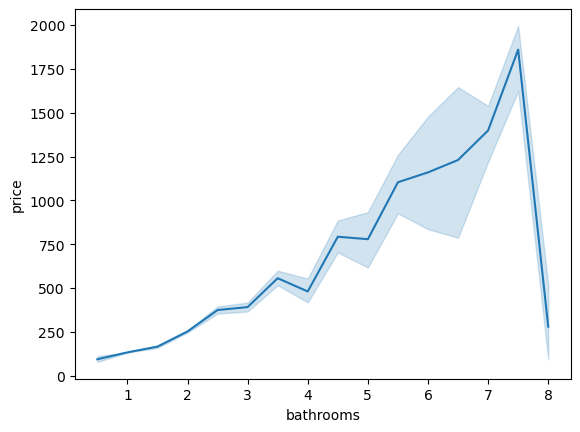

In [22]:
# visualisasi kamar mandi
plt.hist(data1['bathrooms'])
plt.title("Histogram of number of bathrooms")
plt.xlabel("total bathrooms")
plt.ylabel("Frequency")
plt.show()
ax = sns.lineplot(x=data1['bathrooms'], y = data1['price'])

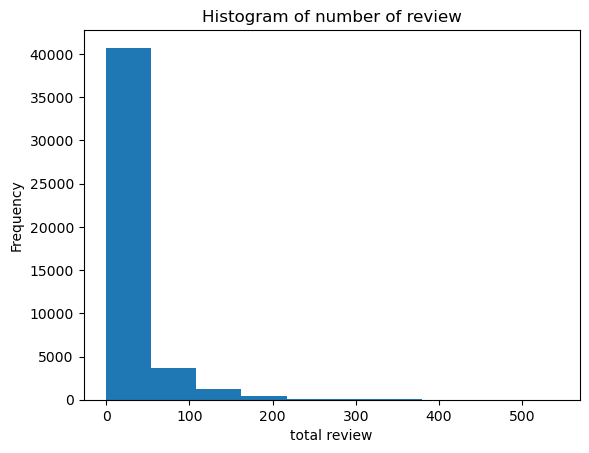

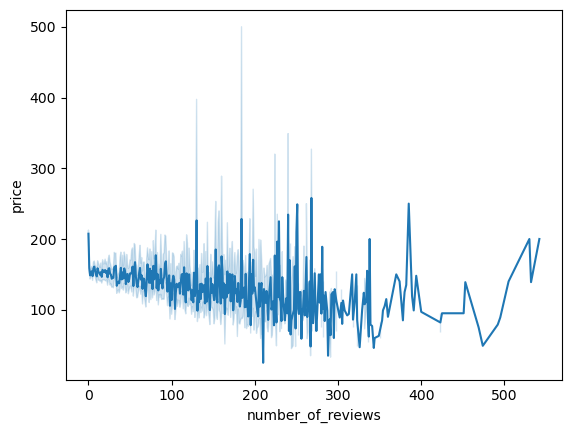

In [23]:
# visualisasi banyaknya orang yang sudah review
plt.hist(data1['number_of_reviews'])
plt.title("Histogram of number of review")
plt.xlabel("total review")
plt.ylabel("Frequency")
plt.show()
ax = sns.lineplot(x=data1['number_of_reviews'], y = data1['price'])

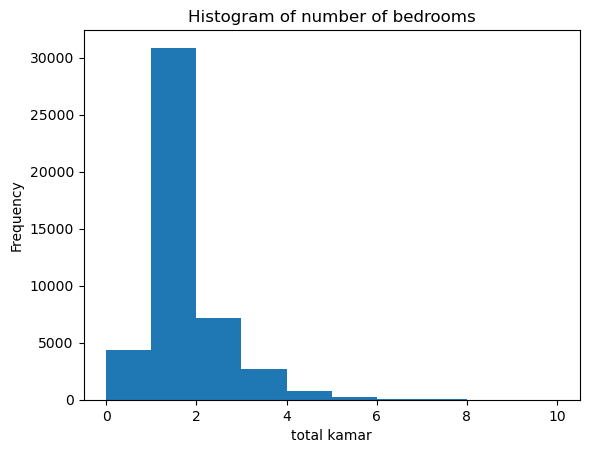

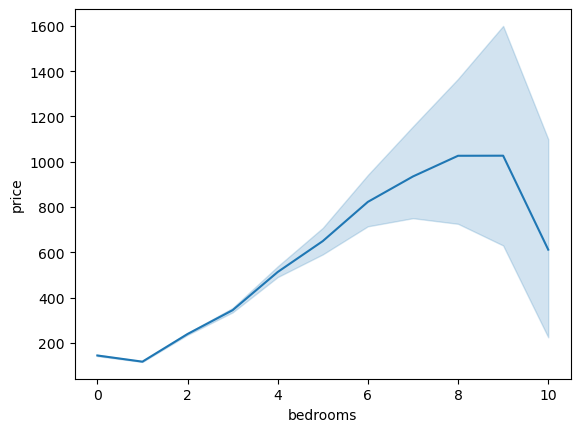

In [24]:
# visualisasi banyaknya kamar
plt.hist(data1['bedrooms'])
plt.title("Histogram of number of bedrooms")
plt.xlabel("total kamar")
plt.ylabel("Frequency")
plt.show()
ax = sns.lineplot(x=data1['bedrooms'], y = data1['price'])

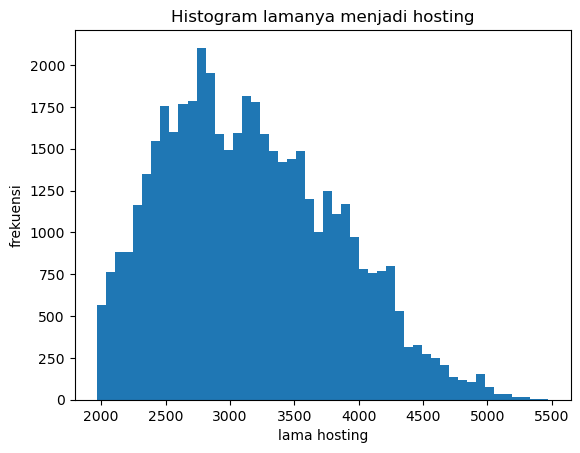

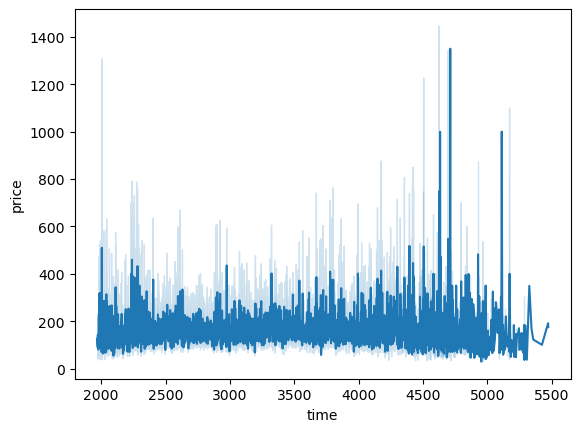

In [34]:
# visualisasi hubungan lamanya hosting dengan price
plt.hist(data1['time'], bins=50)
plt.title("Histogram lamanya menjadi hosting")
plt.xlabel("lama hosting")
plt.ylabel("frekuensi")
plt.show()
ax = sns.lineplot(x=data1['time'], y = data1['price'])

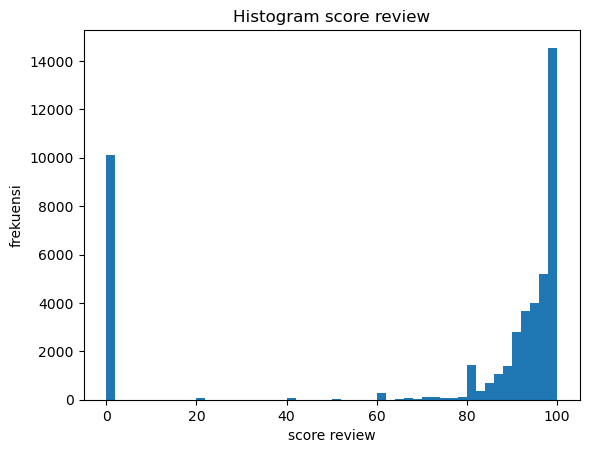

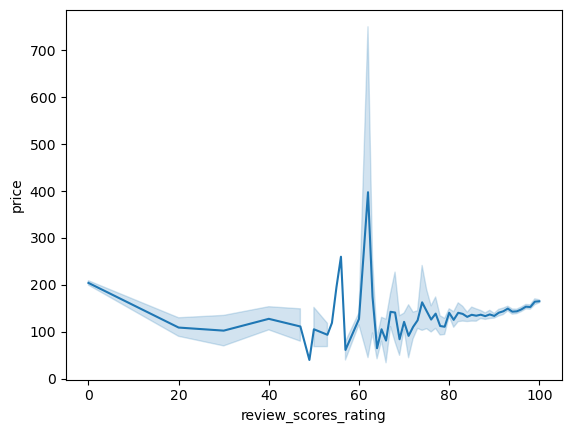

In [33]:
# visualisasi score review dengan harga
plt.hist(data1['review_scores_rating'], bins=50)
plt.title("Histogram score review")
plt.xlabel("score review")
plt.ylabel("frekuensi")
plt.show()
ax = sns.lineplot(x=data1['review_scores_rating'], y = data1['price'])

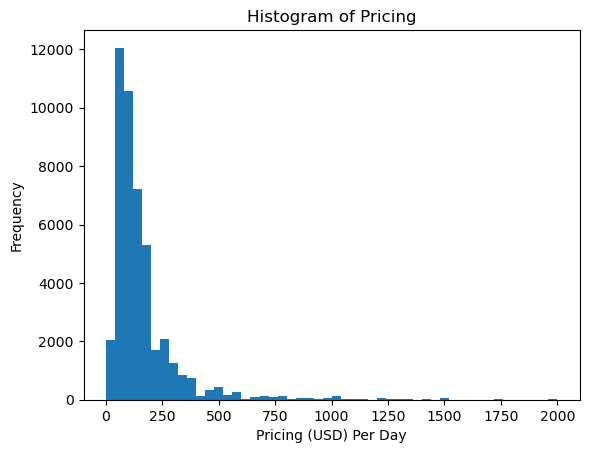

In [51]:
# visualisasi distribusi harga
plt.hist(data1['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

In [52]:
# Oleh karena itu, variabel yang digunakan hanyalah
datafix = data1.drop(columns=['amenities','number_of_reviews'])
datafix.head()

,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,neighbourhood,review_scores_rating,zipcode,bedrooms,beds,price,time
0,Apartment,Entire home/apt,3,1.0,Real Bed,strict,1,NYC,1,1,0,40.696524,-73.991617,Brooklyn Heights,100.0,11201,1.0,1.0,150.0,3988
1,Apartment,Entire home/apt,7,1.0,Real Bed,strict,1,NYC,1,0,1,40.766115,-73.989040,Hell's Kitchen,93.0,10019,3.0,3.0,169.0,2077
2,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,1,NYC,1,1,1,40.808110,-73.943756,Harlem,92.0,10027,1.0,3.0,145.0,2314
3,House,Entire home/apt,4,1.0,Real Bed,flexible,1,SF,1,1,0,37.772004,-122.431619,Lower Haight,0.0,94117,2.0,2.0,750.0,2869
4,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,1,DC,1,1,1,38.925627,-77.034596,Columbia Heights,40.0,20009,0.0,1.0,115.0,2918


In [53]:
datafix.to_csv('explorelatih.csv', index=False)